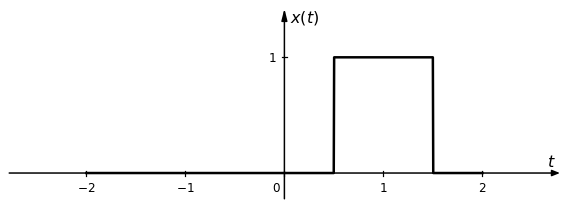

In [13]:
# 1. Usar todo junto (estilo actual)

from blockdiagrams import SignalPlotter

SignalPlotter("rect(t-1)", horiz_range=(-2, 2), vert_range=(0,1.2)).plot()

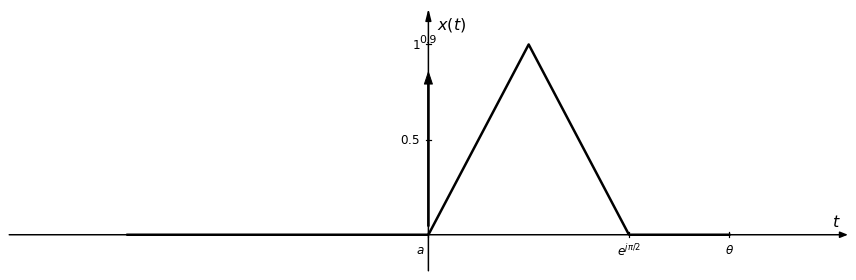

In [5]:
# 2. Usar modularmente

from blockdiagrams import SignalPlotter

p = SignalPlotter("0.9* delta(t) + tri(t - 1)", horiz_range=(-3, 3), figsize=(12,4))
p.setup_axes()
p.draw_labels()
p.draw_function()
p.draw_impulses()
p.draw_ticks(xticks=[0, 2, 3], xtick_labels=['a','e^{j\pi/2}', '\\theta'])
p.show()


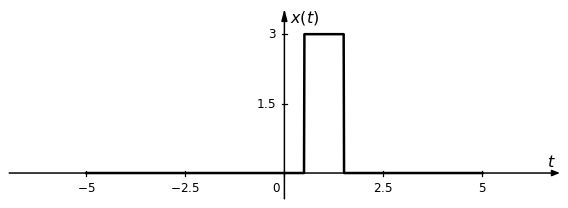

In [6]:
# 3. Usar funciones personalizadas

from blockdiagrams import SignalPlotter

SignalPlotter("3 * rect(t - 1)").plot()

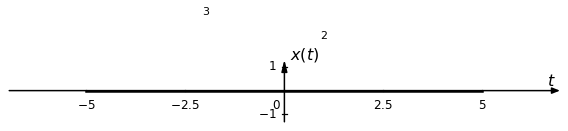

In [7]:
# 4. Impulsos con múltiples raíces

from blockdiagrams import SignalPlotter

SignalPlotter("2*delta(t - 1) + 3*delta(t + 2)").plot()


In [15]:
# 5. Guardar a archivo

from blockdiagrams import SignalPlotter

SignalPlotter("sin(t)*rect(t/2)", save_path="salida.png", show_plot=False).plot()
